<img src="https://brand.umich.edu/assets/brand/style-guide/logo-guidelines/U-M_Logo-Horizontal-Hex.png" alt="Drawing" style="width: 300px;" align="left"/><br>
    
## Week 2: Building prediction models of student success

This week we are jumping into our predictive modeling work. As you saw in the introduction to this week and the various videos and readings, there are multiple factors to consider when implementing a predictive model as a functional data product that instructors will use on a regular basis. To build these initial models, we want to see how you would prepare the data **(Part A)** and engineer a handful of features for both assessments **(Part B)** and VLEs **(Part C)** and extract one or more procedures using principal components analysis **(Part D)**. 

After you have engaged in these initial activities, set up your test train splits **(Part E)**, apply the four algorithms that have worked well with these data in the past **(Part F)**, and provide us with the results of your evaluations **(Part G)**.

Across readings and videos, you were introduced to the idea of data generating mechanisms; as you build your predictive models, you will see a concrete example of this around “missing assessments.” What causes a missing assessment and do I see that represented in my data? Based on the instructional context of OU, missing data is meaningful but it may not be captured by the system. Addressing this issue will help us in thinking about how best to monitor student assessments in the future.


# Open University Learning Analytics (OULAD) dataset

Kuzilek, J., Hlosta, M., & Zdrahal, Z. (2017). Open university learning analytics dataset. Scientific data, 4, 170171. https://www.nature.com/articles/sdata2017171
## Data scheme
![](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fsdata.2017.171/MediaObjects/41597_2017_Article_BFsdata2017171_Fig2_HTML.jpg)
## Course timeline
![](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fsdata.2017.171/MediaObjects/41597_2017_Article_BFsdata2017171_Fig1_HTML.jpg)
## Relational database
* A module is a course
* A presentation is a semester (e.g., 2019J - Fall 2019, 2019B = Winter 2019)
* vle = virtual learning enviroment
![](https://analyse.kmi.open.ac.uk/resources/images/model.png)

---

## We will only use data from code_module BBB and FFF in code_presentation 2013J and 2014J in this week assignment

## A. Prepare the data (10pts)

Load the data 'assets/studentInfo.csv'   
Write a function that returns a pd.DataFrame of shape (6254, 39)

* Create a new column ['outcome'], where outcome == 1 if students achieve a pass or a distinction, outcome == 0 if students failed
* One-Hot Encode categorical features. Use dummies for multi-class features.
* Do not encode ['id_student','code_module','code_presentation']
* Make sure you only use data from code_module BBB and FFF in code_presentation 2013J and 2014J

The final dataframe should consist of the following columns:

 'code_module',  
 'code_presentation',  
 'id_student',  
 'num_of_prev_attempts',  
 'studied_credits',  
 'outcome',    
 'gender_F',  
 'region_East Anglian Region',  
 'region_East Midlands Region',  
 'region_Ireland',  
 'region_London Region',  
 'region_North Region',  
 'region_North Western Region',  
 'region_Scotland',  
 'region_South East Region',  
 'region_South Region',  
 'region_South West Region',  
 'region_Wales',  
 'region_West Midlands Region',  
 'region_Yorkshire Region',  
 'highest_education_A Level or Equivalent',  
 'highest_education_HE Qualification',  
 'highest_education_Lower Than A Level',  
 'highest_education_No Formal quals',  
 'highest_education_Post Graduate Qualification',  
 'imd_band_0-10%',  
 'imd_band_10-20',  
 'imd_band_20-30%',  
 'imd_band_30-40%',  
 'imd_band_40-50%',  
 'imd_band_50-60%',  
 'imd_band_60-70%',  
 'imd_band_70-80%',  
 'imd_band_80-90%',  
 'imd_band_90-100%',  
 'age_band_0-35',  
 'age_band_35-55',  
 'age_band_55<=',  
 'disability_Y'  
  

### Getting Autograder Error in part E, E & G. 
I tried various iterations but not able to pass the autograder. I am making a mistake somewhere and will try again to figure it out. 

Doing some more tests to understand error values in my part E output.  

Thanks 

Prashant 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Testing code:

In [3]:
# Read data: 
stdinfo = pd.read_csv('assets/studentInfo.csv')

# Use code_module BBB and FFF in code_presentation 2013J and 2014J 
df_filter = stdinfo[((stdinfo['code_module']=='BBB') | (stdinfo['code_module']=='FFF')) & ((stdinfo['code_presentation']=='2013J') | (stdinfo['code_presentation']=='2014J'))]

# View data: 
#display(df.head(3), df.tail(3))

# Remove withdrawn students: 
df_info = df_filter[df_filter['final_result']!='Withdrawn']

# Create a new column ['outcome']: 
df_info['outcome'] = (np.where((df_info['final_result']=='Pass') | (df_info['final_result']=='Distinction'), 1, 0))

# One-Hot Encode categorical features. Use dummies for multi-class features
# do not encode ['id_student','code_module','code_presentation']

# see datatypes: 
#df.info()

# filter our objects based on above:: 
df_objects = df_info.select_dtypes('object').iloc[:, 2:-1]

# use one-hot: 
df_dummy = pd.get_dummies(data = df_objects, drop_first= False)


# Concatenate df_dummy with df and drop columns: 
df_final = pd.concat([df_info, df_dummy], axis = 1).drop(columns = df_objects, axis =1).drop(['final_result', 'gender_M', 'disability_N'], axis =1)
df_final

,code_module,code_presentation,id_student,num_of_prev_attempts,studied_credits,outcome,gender_F,region_East Anglian Region,region_East Midlands Region,region_Ireland,...,imd_band_40-50%,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_0-35,age_band_35-55,age_band_55<=,disability_Y
2516,BBB,2013J,23798,0,60,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2520,BBB,2013J,27759,0,120,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2521,BBB,2013J,30091,0,60,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2523,BBB,2013J,31849,0,120,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2524,BBB,2013J,37622,1,120,1,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30048,FFF,2014J,2681198,0,90,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
30049,FFF,2014J,2682682,0,120,1,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
30051,FFF,2014J,2683857,1,90,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
30055,FFF,2014J,2693932,1,120,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


### Implementing Code:

In [4]:
def answer_a():
    
    # YOUR CODE HERE
    # Read data: 
    stdinfo = pd.read_csv('assets/studentInfo.csv')

    # Use code_module BBB and FFF in code_presentation 2013J and 2014J 
    df_filter = stdinfo[((stdinfo['code_module']=='BBB') | (stdinfo['code_module']=='FFF')) & ((stdinfo['code_presentation']=='2013J') | (stdinfo['code_presentation']=='2014J'))]

    # View data: 
    #display(df.head(3), df.tail(3))

    # Remove withdrawn students: 
    df_info = df_filter[df_filter['final_result']!='Withdrawn']

    # Create a new column ['outcome']: 
    df_info['outcome'] = (np.where((df_info['final_result']=='Pass') | (df_info['final_result']=='Distinction'), 1, 0))

    # One-Hot Encode categorical features. Use dummies for multi-class features
    # do not encode ['id_student','code_module','code_presentation']

    # see datatypes: 
    #df.info()

    # filter our objects based on above:: 
    df_objects = df_info.select_dtypes('object').iloc[:, 2:-1]

    # use one-hot: 
    df_dummy = pd.get_dummies(data = df_objects, drop_first= False)


    # Concatenate df_dummy with df and drop columns: 
    result = pd.concat([df_info, df_dummy], axis = 1).drop(columns = df_objects, axis =1).drop(['final_result', 'gender_M', 'disability_N'], axis =1)
    #raise NotImplementedError()
    
    return result
answer_a()

,code_module,code_presentation,id_student,num_of_prev_attempts,studied_credits,outcome,gender_F,region_East Anglian Region,region_East Midlands Region,region_Ireland,...,imd_band_40-50%,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_0-35,age_band_35-55,age_band_55<=,disability_Y
2516,BBB,2013J,23798,0,60,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2520,BBB,2013J,27759,0,120,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2521,BBB,2013J,30091,0,60,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2523,BBB,2013J,31849,0,120,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2524,BBB,2013J,37622,1,120,1,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30048,FFF,2014J,2681198,0,90,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
30049,FFF,2014J,2682682,0,120,1,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
30051,FFF,2014J,2683857,1,90,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
30055,FFF,2014J,2693932,1,120,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [5]:
# Cell for autograder

# Check data frame shape 
assert answer_a().shape == (6254, 39), "Your pandas data frame should have 39 columns and 6254 rows"

# Checking gender column
assert "gender_F" in answer_a(), "Your df should contain a 'gender_F' column where 1 = Female, 0 = Male"

# Check disability column
assert "disability_Y" in answer_a(), "Your df should contain a 'disability_Y' column where 1 = Disabled, 0 = Non-disabled"


## B. Feature engineering: assessments (15pts)

For each unique combination of ['code_module','code_presentation','id_student'], create 3 new features: TMA1, TMA2, TMA3.
* TMA1 is the the weighted score of 1st TMA rank by date 
* TMA2 is the the weighted score of 2nd TMA rank by date
* TMA3 is the the weighted score of 3rd TMA rank by date 

Note:
* Weighted_score = weight * score /100
* If the students did not submit their TMA, then their score == 0. However, since those who did not submit TMA was not recorded in the studentAssessment.csv, you would need to think of a clever way to capture that information. Hint: You can use studentInfo.csv as a reference point. 
* Make sure you only use data from BBB and FFF in 2013J and 2014J

The final dataframe should have a shape of (6254, 6) and it should consists of the following columns:
* 'code_module' 
* 'code_presentation'
* 'id_student'
* 'TMA1'
* 'TMA2'
* 'TMA3'

### Testing Code: 
Here I binned the dates in to TMA1, TMA2, TMA3 and then took weighted score of every first course section.
By doing this, I got rank wise weighted score for each binned date. But that approach led to 0.511% error in my values. So, I tried to modify my approach. 

In [6]:
# Open assessments table: 
assessments = pd.read_csv('assets/assessments.csv')
stdgrade = pd.read_csv('assets/studentAssessment.csv')

# Filter out TMA ('Tutor Marked Assessments')
assessments = assessments[assessments['assessment_type']=='TMA']
# Filter out code_module & code_presentation: 
assessments = assessments[((assessments['code_module']=='BBB') | (assessments['code_module']=='FFF')) & ((assessments['code_presentation']=='2013J') | (assessments['code_presentation']=='2014J'))]

#display(assessments.head(), stdgrade.head(), df_info.head())

# Merge: assessments with studentAssessments
ass_grade = assessments.merge(stdgrade, on = 'id_assessment', how = 'left')

# Calculate weighted score:
ass_grade['weighted_score'] = (ass_grade['weight'] * ass_grade['score'])/100

# But this does not include students who did not submit their TMA. 
ass_grade.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,weighted_score
0,BBB,2013J,14996,TMA,19.0,5.0,23798,18,0,90.0,4.50
1,BBB,2013J,14996,TMA,19.0,5.0,27759,18,0,61.0,3.05
2,BBB,2013J,14996,TMA,19.0,5.0,30091,24,0,80.0,4.00
3,BBB,2013J,14996,TMA,19.0,5.0,31014,4,0,85.0,4.25
4,BBB,2013J,14996,TMA,19.0,5.0,31849,15,0,81.0,4.05


In [7]:
# Sort dates: 
def smallest3(data):
    d = {}
    sorted_date = np.sort(data['date'])
    d['s1'] = sorted_date[0]
    d['s2'] = sorted_date[1]
    d['s3'] = sorted_date[2]
    return pd.Series(d)


TMA_dates = assessments.groupby(["code_module","code_presentation"]).apply(smallest3).reset_index()


# Alternatively: 
#TMA_dates = (assessments.groupby(['code_module', 'code_presentation'])
             #.apply(lambda x: x['date'].sort_values(ascending = True)[:3].reset_index(drop = True))
             #.rename(columns= {0:'s1', 1: 's2', 2:'s3'}))

# remove column name:
#TMA_dates.columns.name = None

TMA_dates

,code_module,code_presentation,s1,s2,s3
0,BBB,2013J,19.0,47.0,96.0
1,BBB,2014J,19.0,54.0,110.0
2,FFF,2013J,19.0,47.0,96.0
3,FFF,2014J,24.0,52.0,94.0


In [8]:
# Merge assessments with TMA_dates: 
ass_TMA = assessments.merge(TMA_dates, on = ['code_module', 'code_presentation'], how = 'left')
ass_TMA.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,s1,s2,s3
0,BBB,2013J,14996,TMA,19.0,5.0,19.0,47.0,96.0
1,BBB,2013J,14997,TMA,47.0,18.0,19.0,47.0,96.0
2,BBB,2013J,14998,TMA,96.0,18.0,19.0,47.0,96.0
3,BBB,2013J,14999,TMA,131.0,18.0,19.0,47.0,96.0
4,BBB,2013J,15000,TMA,166.0,18.0,19.0,47.0,96.0


In [9]:
# Drop rows which have assessment dates not in s1 or s2 or s3 
ass_TMA[np.logical_or(np.logical_or(ass_TMA['date'] == ass_TMA['s1'], ass_TMA['date'] == ass_TMA['s2']),
              ass_TMA['date'] == ass_TMA['s3'])]

,code_module,code_presentation,id_assessment,assessment_type,date,weight,s1,s2,s3
0,BBB,2013J,14996,TMA,19.0,5.0,19.0,47.0,96.0
1,BBB,2013J,14997,TMA,47.0,18.0,19.0,47.0,96.0
2,BBB,2013J,14998,TMA,96.0,18.0,19.0,47.0,96.0
6,BBB,2014J,15020,TMA,19.0,0.0,19.0,54.0,110.0
7,BBB,2014J,15021,TMA,54.0,10.0,19.0,54.0,110.0
8,BBB,2014J,15022,TMA,110.0,20.0,19.0,54.0,110.0
11,FFF,2013J,34873,TMA,19.0,12.5,19.0,47.0,96.0
12,FFF,2013J,34874,TMA,47.0,12.5,19.0,47.0,96.0
13,FFF,2013J,34875,TMA,96.0,25.0,19.0,47.0,96.0
16,FFF,2014J,34899,TMA,24.0,12.5,24.0,52.0,94.0


In [10]:
# Merge: assessments with studentAssessments
ass_grade = ass_TMA.merge(stdgrade, on = 'id_assessment', how='inner')

# Calculate weighted score:
ass_grade['weighted_score'] = (ass_grade['weight'] * ass_grade['score'])/100

ass_grade

,code_module,code_presentation,id_assessment,assessment_type,date,weight,s1,s2,s3,id_student,date_submitted,is_banked,score,weighted_score
0,BBB,2013J,14996,TMA,19.0,5.0,19.0,47.0,96.0,23798,18,0,90.0,4.50
1,BBB,2013J,14996,TMA,19.0,5.0,19.0,47.0,96.0,27759,18,0,61.0,3.05
2,BBB,2013J,14996,TMA,19.0,5.0,19.0,47.0,96.0,30091,24,0,80.0,4.00
3,BBB,2013J,14996,TMA,19.0,5.0,19.0,47.0,96.0,31014,4,0,85.0,4.25
4,BBB,2013J,14996,TMA,19.0,5.0,19.0,47.0,96.0,31849,15,0,81.0,4.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30024,FFF,2014J,34903,TMA,199.0,25.0,24.0,52.0,94.0,2681198,156,0,51.0,12.75
30025,FFF,2014J,34903,TMA,199.0,25.0,24.0,52.0,94.0,2682682,198,0,87.0,21.75
30026,FFF,2014J,34903,TMA,199.0,25.0,24.0,52.0,94.0,2683857,197,0,78.0,19.50
30027,FFF,2014J,34903,TMA,199.0,25.0,24.0,52.0,94.0,2686035,199,0,8.0,2.00


In [11]:
# set(ass_grade['id_assessment']) == set(ass_TMA['id_assessment'])
# Let's see which students did not submit TMA score: 
# merge again: 
ass_grade_info = df_info.merge(ass_grade, on = ['code_module', 'code_presentation', 'id_student'], how = 'left')
# select columns of interest:
cols = ['code_module', 'code_presentation', 'id_student', 'date', 'weighted_score', 's1', 's2', 's3']
select = ass_grade_info[cols]

def tma1(x):
    return x['weighted_score'] if x['date'] == x['s1'] else np.nan

def tma2(x):
    return x['weighted_score'] if x['date'] == x['s2'] else np.nan

def tma3(x):
    return x['weighted_score'] if x['date'] == x['s3'] else np.nan


select["TMA1"] = select.apply(tma1, axis=1)
select["TMA2"] = select.apply(tma2, axis=1)
select["TMA3"] = select.apply(tma3, axis=1)
select = select.fillna(0)
select

,code_module,code_presentation,id_student,date,weighted_score,s1,s2,s3,TMA1,TMA2,TMA3
0,BBB,2013J,23798,19.0,4.50,19.0,47.0,96.0,4.50,0.0,0.00
1,BBB,2013J,23798,47.0,16.20,19.0,47.0,96.0,0.00,16.2,0.00
2,BBB,2013J,23798,96.0,16.02,19.0,47.0,96.0,0.00,0.0,16.02
3,BBB,2013J,23798,131.0,15.84,19.0,47.0,96.0,0.00,0.0,0.00
4,BBB,2013J,23798,166.0,15.66,19.0,47.0,96.0,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
27825,FFF,2014J,2697921,24.0,11.75,24.0,52.0,94.0,11.75,0.0,0.00
27826,FFF,2014J,2697921,52.0,9.00,24.0,52.0,94.0,0.00,9.0,0.00
27827,FFF,2014J,2697921,94.0,21.25,24.0,52.0,94.0,0.00,0.0,21.25
27828,FFF,2014J,2697921,136.0,19.50,24.0,52.0,94.0,0.00,0.0,0.00


In [12]:
# Test output: 
# Group by to get maximum weighted score instead 
result = select.groupby(['code_module', 'code_presentation', 'id_student']).agg({'TMA1': 'max','TMA2': 'max', 'TMA3': 'max'}).reset_index()
result

,code_module,code_presentation,id_student,TMA1,TMA2,TMA3
0,BBB,2013J,23798,4.50,16.20,16.02
1,BBB,2013J,27759,3.05,11.70,10.98
2,BBB,2013J,30091,4.00,12.96,13.50
3,BBB,2013J,31849,4.05,12.60,11.16
4,BBB,2013J,37622,3.50,13.50,12.60
...,...,...,...,...,...,...
6249,FFF,2014J,2681198,8.25,10.75,15.00
6250,FFF,2014J,2682682,12.00,11.75,22.75
6251,FFF,2014J,2683857,9.00,9.00,17.75
6252,FFF,2014J,2693932,11.25,11.00,24.00


In [13]:
result[result['id_student']== 38234]

,code_module,code_presentation,id_student,TMA1,TMA2,TMA3
5,BBB,2013J,38234,3.5,13.86,0.0


### Implementing Code: 

In [14]:
def answer_b():
    
    # YOUR CODE HERE
    # Open assessments table: 
    assessments = pd.read_csv('assets/assessments.csv')
    stdgrade = pd.read_csv('assets/studentAssessment.csv')

    # Filter out TMA ('Tutor Marked Assessments')
    assessments = assessments[assessments['assessment_type']=='TMA']
    # Filter out code_module & code_presentation: 
    assessments = assessments[((assessments['code_module']=='BBB') | (assessments['code_module']=='FFF')) & ((assessments['code_presentation']=='2013J') | (assessments['code_presentation']=='2014J'))]

    #display(assessments.head(), stdgrade.head(), df.head())
    
    # Merge: assessments with studentAssessments
    ass_grade = assessments.merge(stdgrade, on = 'id_assessment', how = 'left')

    # Calculate weighted score:
    ass_grade['weighted_score'] = (ass_grade['weight'] * ass_grade['score'])/100

    # But this does not include students who did not submit their TMA. 
    #ass_grade.head()
    
    # Sort dates: 
    def smallest3(data):
        d = {}
        sorted_date = np.sort(data['date'])
        d['s1'] = sorted_date[0]
        d['s2'] = sorted_date[1]
        d['s3'] = sorted_date[2]
        return pd.Series(d)
    
    # Get sorted dates table:
    TMA_dates = assessments.groupby(["code_module","code_presentation"]).apply(smallest3).reset_index()
    
    # Merge assessments with TMA_dates: 
    ass_TMA = assessments.merge(TMA_dates, on = ['code_module', 'code_presentation'], how = 'left')

    # Drop rows which have assessment dates not in s1 or s2 or s3 
    ass_TMA[np.logical_or(np.logical_or(ass_TMA['date'] == ass_TMA['s1'], ass_TMA['date'] == ass_TMA['s2']),
              ass_TMA['date'] == ass_TMA['s3'])]
    
    # Merge: assessments with studentAssessments
    ass_grade = ass_TMA.merge(stdgrade, on = 'id_assessment', how='inner')

    # Calculate weighted score:
    ass_grade['weighted_score'] = (ass_grade['weight'] * ass_grade['score'])/100
    
    # set(ass_grade['id_assessment']) == set(ass_TMA['id_assessment'])
    # Let's see which students did not submit TMA score: 
    # merge again: 
    ass_grade_info = df_info.merge(ass_grade, on = ['code_module', 'code_presentation', 'id_student'], how = 'left')
    # select columns of interest:
    cols = ['code_module', 'code_presentation', 'id_student', 'date', 'weighted_score', 's1', 's2', 's3']
    select = ass_grade_info[cols]

    def tma1(x):
        return x['weighted_score'] if x['date'] == x['s1'] else np.nan

    def tma2(x):
        return x['weighted_score'] if x['date'] == x['s2'] else np.nan

    def tma3(x):
        return x['weighted_score'] if x['date'] == x['s3'] else np.nan


    select["TMA1"] = select.apply(tma1, axis=1)
    select["TMA2"] = select.apply(tma2, axis=1)
    select["TMA3"] = select.apply(tma3, axis=1)
    select = select.fillna(0)
 
    # Group by to get maximum weighted score instead 
    result = select.groupby(['code_module', 'code_presentation', 'id_student']).agg({'TMA1': 'max','TMA2': 'max', 'TMA3': 'max'}).reset_index()
 
    return result
answer_b()

,code_module,code_presentation,id_student,TMA1,TMA2,TMA3
0,BBB,2013J,23798,4.50,16.20,16.02
1,BBB,2013J,27759,3.05,11.70,10.98
2,BBB,2013J,30091,4.00,12.96,13.50
3,BBB,2013J,31849,4.05,12.60,11.16
4,BBB,2013J,37622,3.50,13.50,12.60
...,...,...,...,...,...,...
6249,FFF,2014J,2681198,8.25,10.75,15.00
6250,FFF,2014J,2682682,12.00,11.75,22.75
6251,FFF,2014J,2683857,9.00,9.00,17.75
6252,FFF,2014J,2693932,11.25,11.00,24.00


In [15]:
# Cell for autograder
ans_b = answer_b() 
# Data frame shape 
assert ans_b.shape == (6254, 6), "Your data frame should have 6 columns and 6254 rows"

# Assert code_module in BBB and FFF only
assert 'AAA' not in ans_b['code_module'].unique(), 'We only use data from BBB and FFF only'

# Assert code_presentation in 2013J and 2014J only
assert '2014B' not in ans_b['code_presentation'].unique(), 'We only use data from 2013J and 2014J only'

# Missing assignment scores as 0
assert ans_b['TMA1'].isnull().sum() < 1, "If the students did not submit their TMA, then their weighted score == 0"
assert ans_b['TMA2'].isnull().sum() < 1, "If the students did not submit their TMA, then their weighted score == 0"
assert ans_b['TMA3'].isnull().sum() < 1, "If the students did not submit their TMA, then their weighted score == 0"


---

## C. Feature engineering: VLE activities (15pts)

Write a function that summarizes the number of clicks on each course section during day [0,100] for each student. It should returns a pd.dataframe with the shape of (6254,7) with the following columns:
* 'code_module'
* 'code_presentation'
* 'id_student'

And compute the sum of click for:
* 'forumng'
* 'homepage'
* 'oucontent'
* 'resource'
* 'glossary'
* 'oucollaborate'
* 'quiz'
* 'subpage'
* 'url'

**Note**: 
* Missing data should be replaced by 0, which means that the students did not click on that course section
* Make sure you only use data from BBB and FFF in 2013J and 2014J

### Testing code: 

In [16]:
# Read files: 
stdvle = pd.read_csv('assets/studentVle.csv')
vle = pd.read_csv('assets/vle.csv')

#display(stdvle.head(),vle.head())

In [17]:
# Merge and select columns: stdvle with vle then with answer_b() to ensure same size dataframe: 
stdvle_vle = stdvle.merge(vle, on = ['code_module', 'code_presentation', 'id_site'])
stdvle_vle=stdvle_vle[['code_module', 'code_presentation', 'id_student', 'date', 'activity_type', 'sum_click']]

# Filter merged columns by:

# course module: 
vle_filter = stdvle_vle[((stdvle_vle['code_module']=='BBB') | (stdvle_vle['code_module']=='FFF')) & ((stdvle_vle['code_presentation']=='2013J') | (stdvle_vle['code_presentation']=='2014J'))]                      

# date: Tried various iterations i.e 0 and 100 Vs between 0 and 100. 
vle_filter = vle_filter[(vle_filter['date']>=0) & (vle_filter['date']<=100)]

# Groupby course section and activity_type:
vle_filter_grp = vle_filter.groupby(['code_module', 'code_presentation', 'id_student', 'activity_type']).agg({'sum_click':'sum'})

# Build pivot table: 
vle_filter_grp_pvt = pd.pivot_table(vle_filter_grp, index = ['code_module', 'code_presentation', 'id_student'], columns = ['activity_type'], values = 'sum_click', aggfunc='sum').reset_index()
vle_filter_grp_pvt.columns.name = None

# Select columns: 
cols = ['code_module', 'code_presentation', 'id_student', 'forumng', 'homepage', 'oucontent', 'resource', 'glossary', 'oucollaborate', 'quiz', 'subpage', 'url']

# Result: 
vle_filter_grp_pvt[cols]

# but above result contains 7784 observations, hence merge with answer_b() to ensure same size dataframes 
result = answer_b()[['code_module', 'code_presentation', 'id_student']].merge(vle_filter_grp_pvt[cols], on = ['code_module', 'code_presentation', 'id_student'], how = 'left').fillna(0)

result



,code_module,code_presentation,id_student,forumng,homepage,oucontent,resource,glossary,oucollaborate,quiz,subpage,url
0,BBB,2013J,23798,113.0,65.0,19.0,2.0,0.0,2.0,31.0,16.0,23.0
1,BBB,2013J,27759,39.0,69.0,7.0,14.0,4.0,0.0,34.0,17.0,14.0
2,BBB,2013J,30091,357.0,120.0,15.0,20.0,0.0,0.0,30.0,30.0,34.0
3,BBB,2013J,31849,395.0,190.0,5.0,9.0,0.0,0.0,28.0,30.0,10.0
4,BBB,2013J,37622,124.0,46.0,4.0,2.0,0.0,0.0,17.0,10.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6249,FFF,2014J,2681198,424.0,273.0,434.0,31.0,0.0,12.0,542.0,156.0,12.0
6250,FFF,2014J,2682682,178.0,164.0,514.0,21.0,0.0,7.0,196.0,134.0,6.0
6251,FFF,2014J,2683857,157.0,290.0,1506.0,19.0,0.0,0.0,531.0,166.0,17.0
6252,FFF,2014J,2693932,61.0,163.0,716.0,13.0,0.0,0.0,553.0,126.0,8.0


### Implementing Code: 

In [18]:
def answer_c():
    
    # Import data
    stdinfo = pd.read_csv("assets/studentInfo.csv")
    vle = pd.read_csv('assets/vle.csv')
    
    # YOUR CODE HERE
    # Merge and select columns: stdvle with vle then with answer_b() to ensure same size dataframe: 
    stdvle_vle = stdvle.merge(vle, on = ['code_module', 'code_presentation', 'id_site'])
    stdvle_vle=stdvle_vle[['code_module', 'code_presentation', 'id_student', 'date', 'activity_type', 'sum_click']]

    # Filter merged columns by:
    # course module: 
    vle_filter = stdvle_vle[((stdvle_vle['code_module']=='BBB') | (stdvle_vle['code_module']=='FFF')) & ((stdvle_vle['code_presentation']=='2013J') | (stdvle_vle['code_presentation']=='2014J'))]                      

    # date: Tried various iterations i.e 0 and 100 Vs between 0 and 100. 
    vle_filter = vle_filter[(vle_filter['date']>=0) & (vle_filter['date']<=100)]

    # Groupby course section and activity_type:
    vle_filter_grp = vle_filter.groupby(['code_module', 'code_presentation', 'id_student', 'activity_type']).agg({'sum_click':'sum'})

    # Build pivot table: 
    vle_filter_grp_pvt = pd.pivot_table(vle_filter_grp, index = ['code_module', 'code_presentation', 'id_student'], columns = ['activity_type'], values = 'sum_click', aggfunc='sum').reset_index()
    vle_filter_grp_pvt.columns.name = None

    # Select columns: 
    cols = ['code_module', 'code_presentation', 'id_student', 'forumng', 'homepage', 'oucontent', 'resource', 'glossary', 'oucollaborate', 'quiz', 'subpage', 'url']

    # Result: 
    vle_filter_grp_pvt[cols]

    # but above result contains 7784 observations, hence merge with answer_b() to ensure same size dataframes 
    result = answer_b()[['code_module', 'code_presentation', 'id_student']].merge(vle_filter_grp_pvt[cols], on = ['code_module', 'code_presentation', 'id_student'], how = 'left').fillna(0)

    #raise NotImplementedError()

    return result
answer_c()

,code_module,code_presentation,id_student,forumng,homepage,oucontent,resource,glossary,oucollaborate,quiz,subpage,url
0,BBB,2013J,23798,113.0,65.0,19.0,2.0,0.0,2.0,31.0,16.0,23.0
1,BBB,2013J,27759,39.0,69.0,7.0,14.0,4.0,0.0,34.0,17.0,14.0
2,BBB,2013J,30091,357.0,120.0,15.0,20.0,0.0,0.0,30.0,30.0,34.0
3,BBB,2013J,31849,395.0,190.0,5.0,9.0,0.0,0.0,28.0,30.0,10.0
4,BBB,2013J,37622,124.0,46.0,4.0,2.0,0.0,0.0,17.0,10.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6249,FFF,2014J,2681198,424.0,273.0,434.0,31.0,0.0,12.0,542.0,156.0,12.0
6250,FFF,2014J,2682682,178.0,164.0,514.0,21.0,0.0,7.0,196.0,134.0,6.0
6251,FFF,2014J,2683857,157.0,290.0,1506.0,19.0,0.0,0.0,531.0,166.0,17.0
6252,FFF,2014J,2693932,61.0,163.0,716.0,13.0,0.0,0.0,553.0,126.0,8.0


In [19]:
# Cell for autograder
ans_c = answer_c()

# Data frame shape 
assert ans_c.shape == (6254, 12), "Your data frame should have 7 columns and 6254 rows"

# Check the click count of homepage, id_student 23798, BBB, 2013
actual =  ans_c[(ans_c['id_student']==23798) &
                 (ans_c['code_module']=='BBB') &
                (ans_c['code_presentation']=='2013J')]['homepage'][0] 
desired = 65
np.testing.assert_almost_equal(actual, desired, decimal=2, err_msg='', verbose=True)


## D. Feature extraction: PCA (15pts)

Many of the features from VLE activities are highly correlated (e.g. if students click on homepage, they will be likely to click on oucontent). One way to reduce the number of highly correlated features is to perform a Principal Component Analysis (PCA). If you need a refresher on PCA, check out a tutorial [here](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

Write a function
* Perform a PCA on the VLE features in answer_c(): forumng, glossary, homepage, oucollaborate, oucontent, quiz,	resource, subpage, url. 
* Make sure to standardize the features before run the PCA.
* Select the minimum number of k components such that the **cummulative variance explained ratio > 0.8**
* Return a pd.dataframe that consist of: 'code_module','code_presentation','id_student', and the principal components that you chose. For example, if you choose k=2 then the columns should be PC1, PC2. If you choose k=3, then the columns should be PC1,PC2,PC3

### Testing Code: 
PCA: Goal is to reduce number of features. 

In [20]:
def answer_d_test_plot():
    """Plot principle components which expalin 80% variance"""
    
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    # Get features, normalize & convert features to array: 
    features = ['forumng', 'glossary', 'homepage', 'oucollaborate', 'oucontent', 'quiz', 'resource', 'subpage', 'url']
    x = answer_c().loc[:, features].values

    # standardize features: 
    sc = StandardScaler()
    x_std = sc.fit_transform(x)

    # Apply PCA to estimate cumulative explained variation ratio: 
    # fit data: 
    pca = PCA().fit(x_std)

    # plot data: 
    _ = plt.plot(np.cumsum(pca.explained_variance_ratio_))
    _ = plt.axhline(y = 0.9, xmin = 0, xmax = 0.58, ls = '--')
    _ = plt.axvline(x = 4.7, ymin = 0, ymax = 0.81, ls = '--')
    _ = plt.xlabel('Principle Components')
    _ = plt.ylabel('Cumulative Explained Variance Ratio')
    _ = plt.title('Principle Components')
    return plt.show()

def answer_d__test_dataframe():
    """Return dataframe containing principle components"""
    
    # this means 5 principal components can explain 90% variance in selected features.
    pca_features = PCA(n_components=5).fit_transform(x_std)

    # Prepare dataframe:
    df_pca_features = pd.DataFrame(pca_features, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

    # merge: 
    result = pd.concat([answer_c()[[ 'code_module','code_presentation','id_student']],df_pca_features], axis = 1)
    return result

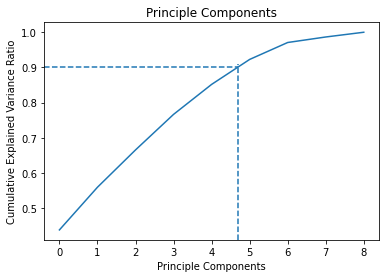

In [21]:
answer_d_test_plot()
#answer_d_dataframe_test()

### Implementing Code: 

In [22]:
def answer_d():
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    df = answer_c()
    
    # YOUR CODE HERE
    # Get features, normalize & convert features to array: 
    features = ['forumng', 'glossary', 'homepage', 'oucollaborate', 'oucontent', 'quiz', 'resource', 'subpage', 'url']
    x = answer_c().loc[:, features].values

    # standardize features: 
    sc = StandardScaler()
    x_std = sc.fit_transform(x)

    # Applying 5 pca_features as per answer_d_test_plot(): 
    pca_features = PCA(n_components=5).fit_transform(x_std)

    # Prepare dataframe:
    df_pca_features = pd.DataFrame(pca_features, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

    # concatenate: 
    result = pd.concat([answer_c()[['code_module','code_presentation','id_student']],df_pca_features], axis = 1)    
    #raise NotImplementedError()

    return result
answer_d()

,code_module,code_presentation,id_student,PC1,PC2,PC3,PC4,PC5
0,BBB,2013J,23798,-0.695652,0.718318,-0.647355,0.463564,0.285834
1,BBB,2013J,27759,-1.023417,0.875059,0.044185,0.191147,-0.269344
2,BBB,2013J,30091,0.023630,1.416387,-0.930177,1.379336,0.013472
3,BBB,2013J,31849,-0.533287,0.807352,-0.736071,0.417570,0.200400
4,BBB,2013J,37622,-1.523585,0.183627,-0.336110,-0.074543,0.051677
...,...,...,...,...,...,...,...,...
6249,FFF,2014J,2681198,2.444785,-0.784924,0.408293,-0.499227,1.087636
6250,FFF,2014J,2682682,0.881784,-0.714514,0.398762,-0.418881,0.450744
6251,FFF,2014J,2683857,2.940741,-1.296219,-0.297576,-0.596870,-1.893197
6252,FFF,2014J,2693932,1.185037,-1.117595,-0.239997,-0.636292,-1.377570


In [23]:
# Cell for autograder


### The subsequent questions will depend on the previous output. So make sure you submit the assignment at this point to ensure you got the right output before moving on

## E. Train-test split (15pts)

Write a function that
* Combine all the features from answer_a(), answer_b(), and answer_d() into a single dataframe
* Split the data into a training set and a test set, make sure to use stratified sample because we have imbalanced data
* Return X_train, X_test, y_train, y_test as np.arrays
* Perform a feature scaling using Standard Scaler. Make sure to split the data before standardizing to avoid data leakage  

Note: 
* Whenever appropriate, using a random_state =42
* 'code_module','code_presentation','id_student' should be excluded in the feature sets

### Testing code: 

1) By not re-scaling PCA values and scaling binary values along with other data. Error reduced from 78% to 7.85%. 

In [24]:
def answer_e_test():
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    # Combine dataframes: 
    a= answer_a()
    b = answer_b()
    d = answer_d()

    df_abd = a.merge(b, on = ['code_module','code_presentation','id_student']).merge(d, on = ['code_module','code_presentation','id_student']).sort_values(['code_module','code_presentation','id_student']).reset_index(drop=True)
    df = df_abd.iloc[:, 3:]

    #Input features: 
    ind_x = df.columns[df.columns != 'outcome']
    X = df.loc[:, ind_x]

    # Target Variable
    ind_y = df.columns[df.columns == 'outcome']
    y = df.loc[:, ind_y]

    # Split dataset: 
    X_train_1, X_test_1, y_train, y_test = train_test_split(X, y,  random_state = 42, stratify = y)


    def standardize(data):
        """Standardize int and float datatype """
        # Standardize X_train and X_test excluding pca (already scaled): 
        data_non_std = data.iloc[:, :-5] # exclude pca
        df_data_std = pd.DataFrame(StandardScaler().fit_transform(data_non_std),columns = data_non_std.columns, index = data_non_std.index)
        df_pca = data.iloc[:, -5:]

        # concat: 
        df_data = pd.concat([df_data_std, df_pca], axis = 1)

        return df_data
    
    X_train =standardize(X_train_1).to_numpy()
    X_test = standardize(X_test_1).to_numpy()
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()

    return X_train, X_test, y_train, y_test

In [25]:
answer_e_test()

(array([[-0.33545453, -0.64106258,  0.93956266, ...,  0.3255645 ,
         -0.33153607, -0.35596668],
        [-0.33545453, -0.64106258, -1.06432496, ..., -1.46603557,
         -0.39707957, -0.5744341 ],
        [-0.33545453, -0.64106258, -1.06432496, ..., -0.33446268,
          0.15135533, -0.86328525],
        ...,
        [ 1.72921966, -0.64106258,  0.93956266, ..., -0.53483558,
          0.67314599, -0.14890316],
        [-0.33545453, -0.64106258, -1.06432496, ..., -0.10277655,
         -0.34819839, -0.75310374],
        [-0.33545453, -0.64106258, -1.06432496, ..., -0.09977875,
         -0.11704425, -0.06193828]]),
 array([[-0.35559012,  2.9580139 , -1.04580503, ..., -0.71478303,
          0.67818017,  1.65698887],
        [ 3.44060746,  0.22691268, -1.04580503, ..., -0.2839775 ,
          0.2916256 , -0.51580832],
        [-0.35559012,  1.13727975, -1.04580503, ..., -0.18384384,
         -0.20273301,  0.00580325],
        ...,
        [-0.35559012,  0.22691268, -1.04580503, ..., -

### Implementating code: 

### Re-testing: 
1. Scaling entire feature set. 

In [26]:
def answer_e():
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    # Call data from the previous answers
    a = answer_a()
    b = answer_b()
    d = answer_d()
    
    # YOUR CODE HERE
    # Combine dataframes: 
    df_abd = a.merge(b, on = ['code_module','code_presentation','id_student'], how = 'left').merge(d, on = ['code_module','code_presentation','id_student'], how = 'left').sort_values(['code_module','code_presentation','id_student']).reset_index(drop=True)
    df = df_abd.iloc[:, 3:]
    
    # Input features: 
    ind_x = df.columns[df.columns!='outcome']
    X = df.loc[:, ind_x]

    # Target Variable
    ind_y = df.columns[df.columns=='outcome']
    y = df.loc[:, ind_y]

    # Split dataset: 
    X_train_1, X_test_1, y_train, y_test = train_test_split(X, y,  random_state = 42, stratify = y)
    
    scaler = StandardScaler().fit(X_train_1)


    def standardize(data):
        """Standardize int and float datatype """
        #Standardize X_train and X_test including pca (already scaled) and binary features: 
       
        df_std = pd.DataFrame(scaler.transform(data))

        return df_std

    X_train, X_test = standardize(X_train_1), standardize(X_test_1)
    # For Testing only: 
    return X_train.to_numpy(), X_test.to_numpy(), y_train.squeeze(), y_test.squeeze()



In [27]:
answer_e()

(array([[-0.33545453, -0.64106258,  0.93956266, ...,  0.30849208,
         -0.32624194, -0.40296684],
        [-0.33545453, -0.64106258, -1.06432496, ..., -1.39651363,
         -0.38966407, -0.64792381],
        [-0.33545453, -0.64106258, -1.06432496, ..., -0.31963366,
          0.14102032, -0.97179865],
        ...,
        [ 1.72921966, -0.64106258,  0.93956266, ..., -0.51032183,
          0.64592283, -0.17079651],
        [-0.33545453, -0.64106258, -1.06432496, ..., -0.09914574,
         -0.34236497, -0.84825744],
        [-0.33545453, -0.64106258, -1.06432496, ..., -0.09629283,
         -0.1186923 , -0.07328699]]),
 array([[-3.35454526e-01,  2.99611690e+00, -1.06432496e+00, ...,
         -6.81571783e-01,  6.50794078e-01,  1.85406301e+00],
        [ 3.79389384e+00,  2.68232292e-01, -1.06432496e+00, ...,
         -2.71588602e-01,  2.76750642e-01, -5.82189553e-01],
        [-3.35454526e-01,  1.17752716e+00, -1.06432496e+00, ...,
         -1.76294759e-01, -2.01607681e-01,  2.66831454e-

In [28]:
# Cell for autograder
X_train, X_test, y_train, y_test = answer_e()

# Data length
assert X_train.shape == (4690, 43), "There should be 4690 data points and 40 features in the train set"
assert X_test.shape == (1564, 43), "There should be 1564 data points and 40 features in the test set"

# Feature normalization
assert (X_train < 200).all(), "You should perform a feature scaling after spliting the data"


## F. Apply classification algorithms (15pts)

Write a function that applies four different classification algorithms using the training and testing sets obtained from answer_e():
* Logistic Regression (random_state=42)
* Random Forest (random_state=42)
* Support Vector Machine (random_state=42)
* K-Nearest Neighbour (n_neighbors=5)

Return a pd.dataframe of shape (4,4) with the following columns ['Accuracy','Recall', 'Precision', 'Model']

**Resources**: You can find more details about the pros and cons of each alogrithm [here](https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222)

### Testing code: 
Use ML pipeline to fit, predict and score model: 

In [29]:
def answer_f_test():
    """Return Accurcay, Recall, Precision and Model name"""
    from sklearn.pipeline import Pipeline
    from sklearn.metrics import recall_score, precision_score, accuracy_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.preprocessing import StandardScaler

    # Build pipeline: 
    models = [('lr', LogisticRegression(random_state=42)), ('rfc', RandomForestClassifier(random_state=42)),('svc', SVC(random_state=42)), ('knn', KNeighborsClassifier(n_neighbors=5))]
    
    # empty dataframe (Optional):
    df_score = pd.DataFrame(columns = ['Accuracy', 'Recall','Precision', 'Model'], index = range(0,4))
    
    # model names
    model_name = ['Logistics Regression', 'Random Forest', 'Support Vector Machine', 'K-Nearest Neighbour']

    # empty score list:
    accuracy = []
    recall = []
    precision = []
    
    # data:     
    X_train, X_test, y_train, y_test = answer_e() 
    
    # Fit model and predict:
    for i in models: 
        
        # initiate
        model_pipelines = Pipeline(steps= [i])
        
        # fit
        model_pipelines.fit(X_train, y_train)
        
        # predict
        y_pred = model_pipelines.predict(X_test)
        
        # score
        accuracy.append(accuracy_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))

    # build dataframe: 
    #approach 1:
    df_score.iloc[:,0] = accuracy 
    df_score.iloc[:,1] = recall
    df_score.iloc[:,2] = precision
    df_score.iloc[:,3] = model_name
    
    # alternatively, approach 2: 
            
    #df_score = pd.DataFrame({'Accuracy': accuracy,
                            # 'Recall': recall,
                            # 'Precision': precision,
                            # 'Model': model_name})
    
    return df_score



In [30]:
#answer_f_test()

### Implementing Code:

In [31]:
def answer_f():
    from sklearn.pipeline import Pipeline
    from sklearn.metrics import recall_score, precision_score, accuracy_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.preprocessing import StandardScaler
    # Call data from the previous answers
    X_train, X_test, y_train, y_test = answer_e()
    
    # Standardizing features
    
    # YOUR CODE HERE
    # Build pipeline: 
    models = [('lr', LogisticRegression(random_state=42)), ('rfc', RandomForestClassifier(random_state=42)),('svc', SVC(random_state=42)), ('knn', KNeighborsClassifier(n_neighbors=5))]
    
    # model names
    model_name = ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'K-Nearest Neighbour']

    # empty score list:
    accuracy = []
    recall = []
    precision = []
    
    # Fit model and predict:
    for i in models: 
        
        # initiate
        model_pipelines = Pipeline(steps= [i])
        
        # fit
        model_pipelines.fit(X_train, y_train)
        
        # predict
        y_pred = model_pipelines.predict(X_test)
        
        # score
        accuracy.append(accuracy_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        
    # build dataframe:
    df_score = pd.DataFrame({'Accuracy': accuracy,
                             'Recall': recall,
                             'Precision': precision,
                             'Model': model_name})    
    
    
    return df_score
    #raise NotImplementedError()
    

In [32]:
#answer_f()

In [33]:
# Cell for autograder
ans_f = answer_f()

# Data frame shape 
assert ans_f.shape == (4,4), "Your data frame should 4 rows and 4 columns"

# Check accuracy of LR 
actual =  ans_f.loc[ans_f['Model']=='Logistic Regression']['Accuracy'].values 
desired = 0.86317136
np.testing.assert_almost_equal(actual, desired, decimal=2, err_msg='The accuracy of Logistic Regression is not correct', verbose=True)


In [34]:
answer_f()

,Accuracy,Recall,Precision,Model
0,0.862532,0.953111,0.866393,Logistic Regression
1,0.857417,0.953111,0.860749,Random Forest
2,0.858056,0.971145,0.850039,Support Vector Machine
3,0.785166,0.927863,0.800778,K-Nearest Neighbour


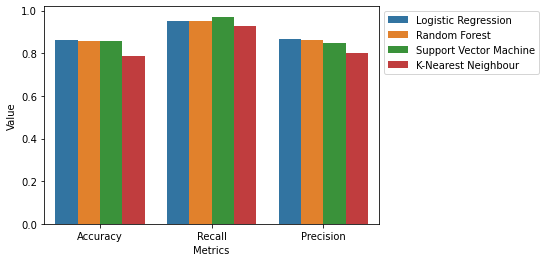

In [35]:
# Run to plot your result 
df = answer_f()
df = df.melt('Model', var_name='Metrics', value_name='Value')
sns.barplot(x="Metrics", y="Value", hue="Model", data=df)
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

## G. Model evaluation (15pts)

Write a function that applies 2 different classification algorithms using 10-fold [stratified cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html):

* Logistic regression
* Random forest

For each algorithm, return the mean roc_auc and standard deviation roc_auc
The final output should be a pd.DataFrame with the following columns: 'mean_auc_score','std_auc_score','model'

Note: 
* While running the [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), you can speed up the processing time by setting the number of jobs to run in parallel (e.g., n_jobs = 2) to make use of multi-core processing. See more in the documentation
* Make sure you use random_state=42 in setting up the StratifiedKFold, LogisticRegression, and RandomForestClassifier


### Testing code: 
Use ML pipeline to fit, predict and score model:

In [36]:
def answer_g_test():     
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import StratifiedKFold
    from sklearn.model_selection import cross_val_score
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    # Call data from the previous answers
    X_train, X_test, y_train, y_test = answer_e()
    X = np.concatenate((X_train,X_test), axis=0)
    y = np.concatenate((y_train,y_test), axis=0)

    models = [('lr', LogisticRegression(random_state=42)), ('rfc', RandomForestClassifier(random_state=42))]
    model_name = ['Logistics Regression', 'Random Forest']

    # kfold
    v = StratifiedKFold(n_splits = 10, shuffle=True, random_state= 42)

    # empty score list
    mean_auc_score = []
    std_auc_score = []

    # iterate
    for i in models: 
        # initiate
        model_pipelines = Pipeline(steps= [i])

        # cross val fit pipeline
        mean_auc_score.append(np.mean(cross_val_score(model_pipelines, X, y, scoring= 'roc_auc', cv = v, n_jobs=2)))
        std_auc_score.append(np.std(cross_val_score(model_pipelines, X, y, scoring= 'roc_auc', cv = v, n_jobs=2)))

    # build dataframe:
    df_score = pd.DataFrame({'model': model_name,
                             'mean_auc_score': mean_auc_score,
                             'std_auc_score': std_auc_score})
    
    
    return df_score


In [37]:
#answer_g_test()

### Implementing Code:

In [38]:
def answer_g():
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier    
    from sklearn.model_selection import StratifiedKFold
    from sklearn.model_selection import cross_val_score
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    # Call data from the previous answers
    X_train, X_test, y_train, y_test = answer_e()
    X = np.concatenate((X_train,X_test), axis=0)
    y = np.concatenate((y_train,y_test), axis=0)

    # YOUR CODE HERE
    # Build pipeline
    models = [('lr', LogisticRegression(random_state=42)), ('rfc', RandomForestClassifier(random_state=42))]
    model_name = ['Logistic Regression', 'Random Forest']

    # kfold
    v = StratifiedKFold(n_splits = 10, shuffle= True, random_state = 42)

    # empty score list
    mean_auc_score = []
    std_auc_score = []

    # iterate
    for i in models: 
        # initiate
        model_pipelines = Pipeline(steps= [i])

        # cross val fit pipeline
        mean_auc_score.append(np.mean(cross_val_score(model_pipelines, X, y, scoring= 'roc_auc', cv = v, n_jobs=2)))
        std_auc_score.append(np.std(cross_val_score(model_pipelines, X, y, scoring= 'roc_auc', cv = v, n_jobs=2)))

    # build dataframe:
    df_score = pd.DataFrame({'model': model_name,
                             'mean_auc_score': mean_auc_score,
                             'std_auc_score': std_auc_score})
    
    
    return df_score


# output:
answer_g()


,model,mean_auc_score,std_auc_score
0,Logistic Regression,0.898347,0.013900
1,Random Forest,0.893262,0.012449


In [39]:
# Cell for autograder
ans_g = answer_g()

# Data frame shape 
assert ans_g.shape == (2,3), "Your data frame should 4 rows and 4 columns"

# Check mean_auc_score of Logistic Regression
actual =  ans_g.loc[ans_g['model']=='Logistic Regression']['mean_auc_score'].values 
desired = 0.898349
np.testing.assert_almost_equal(actual, desired, decimal=2, err_msg='The mean AUC of Logistic Regression is not correct', verbose=True)



In [40]:
# Print answer:
ans_g.loc[ans_g['model']=='Logistic Regression']['mean_auc_score'].values

array([0.89834673])